In this Project, I'll explore the effectiveness of deep, feedforward neural networks at classifying images.



In [6]:
# Import load_digits() from the sklearn.datasets package
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

%matplotlib inline 

digits_data = load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [13]:
data.shape

(1797, 64)

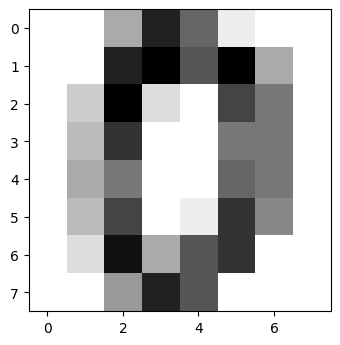

In [11]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

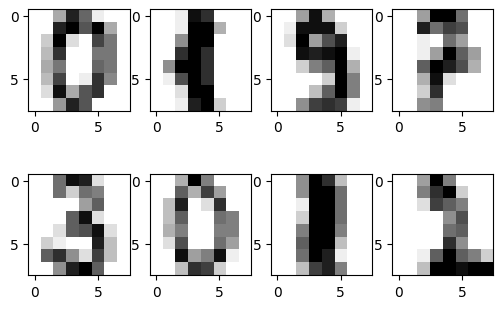

In [12]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### K-Nearest Neighbors Model


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

kf = KFold(4, shuffle=True, random_state=1)
clf = KNeighborsClassifier()
mses = cross_val_score(clf, data, labels, scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(mses)
print(rmses)
print(avg_rmse)

[-0.1        -0.69933185 -0.24721604 -0.71046771]
[0.31622777 0.83626063 0.49720824 0.84289246]
0.6231472765417181


In [22]:
hyper_params = [x for x in range(1, 11)]
rmses_values = []
avg_rmse_values = []

for x in hyper_params:
    
    kf = KFold(4, shuffle=True, random_state=1)
    clf = KNeighborsClassifier(n_neighbors=x)
    mses = cross_val_score(clf, data, labels, scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmses = np.mean(rmses)
    rmses_values.append(rmses)
    avg_rmse_values.append(avg_rmses)

print(rmses_values)
print(avg_rmse_values)

[array([0.46427961, 0.71882111, 0.4695636 , 0.87019441]), array([0.48534066, 0.92116901, 0.55035927, 0.93912721]), array([0.3681787 , 0.74169492, 0.41411617, 0.7295848 ]), array([0.2538591 , 0.86763124, 0.43764912, 0.81056498]), array([0.31622777, 0.83626063, 0.49720824, 0.84289246]), array([0.4472136 , 0.83626063, 0.55839413, 0.96716701]), array([0.35590261, 0.53600851, 0.6773458 , 0.86377222]), array([0.35590261, 0.79250386, 0.61350793, 0.90531713]), array([0.35901099, 0.80505087, 0.64189308, 0.94385836]), array([0.30550505, 0.85470009, 0.66070085, 0.92116901])]
[0.6307146822854319, 0.7239990349815327, 0.5633936502228671, 0.5924261096767243, 0.6231472765417181, 0.7022588436590453, 0.6082572838042745, 0.6668078818063696, 0.6874533235053324, 0.6855187488894096]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / 50% test validation

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9888728037614452

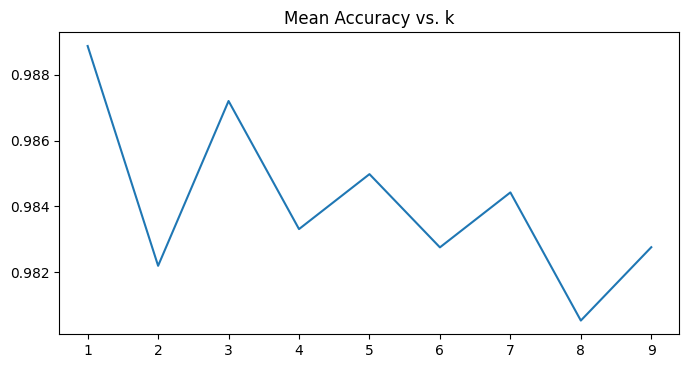

In [24]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

There are a few downsides to using k-nearest neighbors:

high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
no model representation to debug and explore

### Neural Network With 1 Hidden Layer


In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(8)
shuffled_index = np.random.permutation(data.index)
shuffled_data = data.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]

# 50% Train / 50% Test 
mid_length = int(len(shuffled_data)/2)
nn_accuracies = []

train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

mlp = MLPClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='logistic')

mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)
accuracy = accuracy_score(test_labels, nn_predictions)
print(accuracy)

0.9744160177975528


In [34]:
neurons = [8, 16, 32, 64, 128, 256]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.8865406006674083, 0.9543937708565072, 0.9577308120133482, 0.9688542825361512, 0.9733036707452726, 0.9755283648498332]


Text(0, 0.5, 'accuracy')

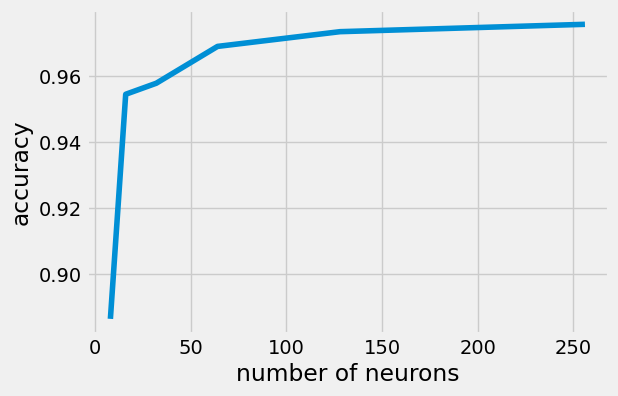

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline 

style.use('fivethirtyeight')

plt.plot(neurons, accuracies)
plt.xlabel('number of neurons')
plt.ylabel('accuracy')

In [43]:
def cross_validate_nn(n):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]      
        mlp = MLPClassifier((n,), activation='logistic', max_iter=1000)
        mlp.fit(train_features, train_labels)
        nn_predictions = mlp.predict(test_features)
        overall_accuracy = accuracy_score(test_labels, nn_predictions)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



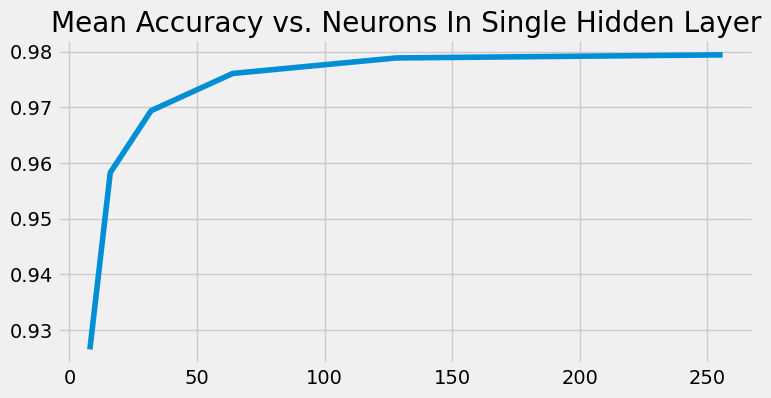

In [44]:
neurons = [8, 16, 32, 64, 128, 256]
n_overall_accuracies = []

for n in neurons:
    n_accuracies = cross_validate_nn(n)
    n_mean_accuracy = np.mean(n_accuracies)
    n_overall_accuracies.append(n_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, n_overall_accuracies)

### Neural Network With 2 Hidden Layer


In [ ]:
# Network with 2 hidden layers, 1 neuron in each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='logistic')

In [45]:
def cross_validate_nn_two(n):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]      
        mlp = MLPClassifier((n,n), activation='logistic', max_iter=1000)
        mlp.fit(train_features, train_labels)
        nn_predictions = mlp.predict(test_features)
        overall_accuracy = accuracy_score(test_labels, nn_predictions)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

accuracy_two_layers = cross_validate_nn_two(64)
print(accuracy_two_layers)

[0.9644444444444444, 0.9643652561247216, 0.977728285077951, 0.9755011135857461]


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



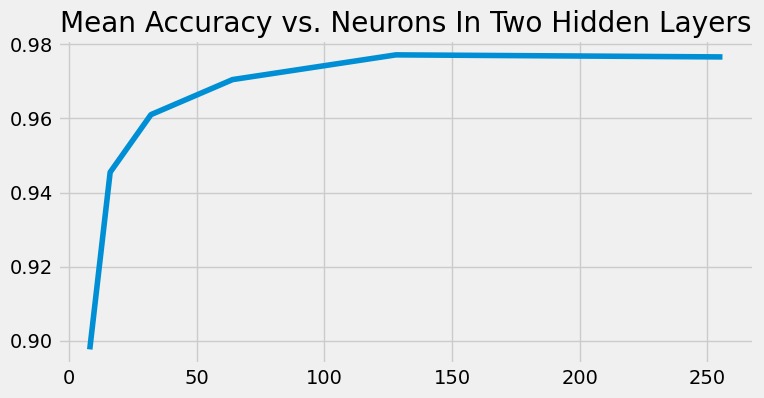

In [46]:
neurons = [8, 16, 32, 64, 128, 256]
n_overall_accuracies = []

for n in neurons:
    n_accuracies = cross_validate_nn_two(n)
    n_mean_accuracy = np.mean(n_accuracies)
    n_overall_accuracies.append(n_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")
plt.plot(neurons, n_overall_accuracies)

### Neural Network With 3 Hidden Layer


In [47]:
# pipeline to use 6 fold cross validation
# Network with 3 hidden layers of varying neuron counts in each hidden layer

def cross_validate_nn_three(n):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]      
        mlp = MLPClassifier((n,n,n), activation='logistic', max_iter=1000)
        mlp.fit(train_features, train_labels)
        nn_predictions = mlp.predict(test_features)
        overall_accuracy = accuracy_score(test_labels, nn_predictions)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



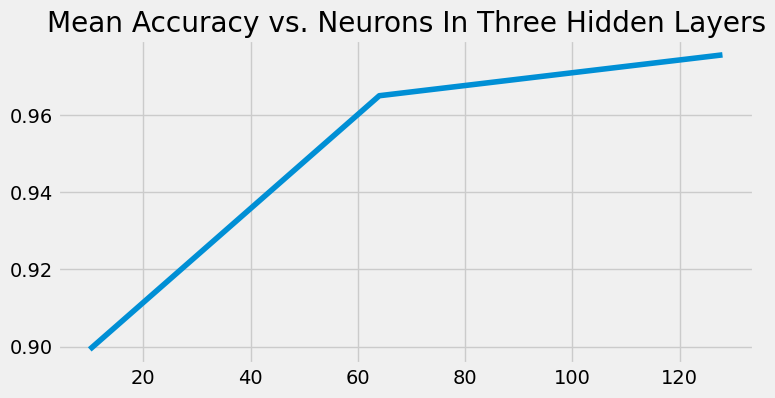

In [48]:
neurons = [10, 64, 128]
n_overall_accuracies = []

for n in neurons:
    n_accuracies = cross_validate_nn_three(n)
    n_mean_accuracy = np.mean(n_accuracies)
    n_overall_accuracies.append(n_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")
plt.plot(neurons, n_overall_accuracies)